# Lending Club Data analysis

### Importing required libraries like numpy and pandas

In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### import the loan file in the form of dataset

In [418]:
Loan_df = pd.read_csv('loan.csv')

C:\Users\Lkedar\AppData\Local\Temp\ipykernel_22728\2834756692.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  Loan_df = pd.read_csv('loan.csv')


In [419]:
#Checking the basic info of load data frame
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#
According to the above we come to know there are total 39716 rows
Total number of recode:39717  
Total no. columns: 111
Type of Columns
1. float64 type : 74
2. int64: 13
3. object:24

Using this info we will check how many column are blank.




In [420]:
Loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

After execution of obove command, we observe that some column are totally blank.
We can remove these columns
First we'll find all name of blank columns


In [421]:
blank_columns = Loan_df.columns[df.isnull().sum()==39717]
blank_columns
#below are list of columns that does't contain any data, hence can be delete

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [422]:
#Total Blank colmns
len(blank_columns)

54

In [423]:
newloan_df = Loan_df.drop(blank_columns,axis=1)
newloan_df
#below is the new dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [424]:
#check shape
newloan_df.shape      


(39717, 57)

In [195]:
#check new dataframe info
newloan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [425]:
newloan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [406]:


# After checking the isnull funtion column wise, we found out that 2 more column can be droped 
# as the missing values are more than 90%. 
#We can found out by executing the below statement for colunms

 

In [426]:
newloan_df[['mths_since_last_record','next_pymnt_d']].isnull().sum()/len(newloan_df.index)*100

mths_since_last_record    92.985372
next_pymnt_d              97.129693
dtype: float64

In [427]:
#Droping the columns which has missing valaues more than 90%
#newloan_df = newloan_df.drop(['mths_since_last_record','next_pymnt_d'],axis=1)
newloan_df = newloan_df.drop(['mths_since_last_record','next_pymnt_d'],axis=1)


In [429]:
newloan_df.shape

(39717, 54)

In [428]:
#we can also drop the desc column as it does hold any significance in our analysis
newloan_df = newloan_df.drop(['desc'],axis=1)


In [411]:
newloan_df.shape|

(39717, 54)

In [ ]:
#Checking for row having missing values more than 5. And again validating the missing count using the index

In [412]:
index=newloan_df[newloan_df.isnull().sum(axis=1)>5].index
print(list(index))|

[39659, 39660]


In [430]:
newloan_df.loc[[39659,39660]].isnull().sum(axis=1)

39659    6
39660    6
dtype: int64

In [88]:
# droping the rows using the index

In [431]:
newloan_df = newloan_df.drop(list(newloan_df[newloan_df.isnull().sum(axis=1)>5].index),axis=0)

In [432]:
newloan_df.shape

(39715, 54)

### Conversion of columns from object to numeric numbers

In [ ]:
#Convert int_rate and emp_length columns


In [433]:
#int_rate
newloan_df['int_rate'] = newloan_df['int_rate'].apply(lambda x:pd.to_numeric(x.split('%')[0]))

In [434]:
newloan_df['int_rate'].head()
cleanloan = newloan_df.copy()
newloan_df= cleanloan.copy()

In [435]:
#emp_length
tenure_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
newloan_df['emp_tenure_num'] = newloan_df['emp_length'].map(tenure_mapping)
newloan_df['emp_tenure_num'].isnull().sum()

1075

###### Now that we have clean the data we will proceed to analysis. if more data cleaning as and when needed 


# Analysis
Lets start with the analysis. 
First of all we'll see the percentage of defaulter in the complete cleaned dataframe

In [436]:
newloan_df['loan_status'].value_counts()

Fully Paid     32948
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [437]:
numberOfChargeOfLoan =  len(newloan_df[newloan_df['loan_status']=='Charged Off'])
numberOfTotalRecord = len(newloan_df)

percentOfDefaulters = (numberOfChargeOfLoan*100)/numberOfTotalRecord
print(percentOfDefaulters)

14.168450207730077


###### So in the the complete data set there 14.16% defaulters

###### 1. Let consider loan status and Grade on the bar char for comparison
 Form here on we will consider only 'Charged Off' records
 We'll try to analyse Charged Off loan with Grade

In [361]:
chargedOff_df = newloan_df[newloan_df['loan_status']=='Charged Off']

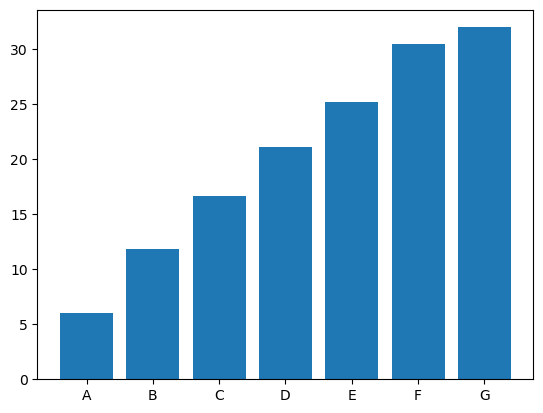

In [382]:
totalLoans_count_gradewise=newloan_df.groupby('grade').size()
chargedOffloans_count_gradewise=chargedOff_df.groupby('grade').size()
percentage_gradewise=(chargedOffloans_count_gradewise / totalLoans_count_gradewise) * 100
plt.bar(percentage_gradewise.index, percentage_gradewise.values)
plt.show()

After anaysing the above graph, we observe that the as the grading of the applicant decreases, charged Off loan increases.
So we while approving the loan Grade of the applicant is one of the most important parameter to consider.


In [ ]:
chargeOff_df = newloan_df[newloan_df['loan_status']=='Charged Off']
chargeOff_df.shape

In [160]:
pvt_table=pd.pivot_table(chargeOff_df, values = 'loan_amnt', index=['loan_status','verification_status'], columns = ['grade'], aggfunc='count')

In [161]:
table=pvt_table.reset_index()
#table=table[table['verification_status']=='Not Verified']
table['A%'] = table['A'].apply(lambda x: (x*100/table['A'].sum()))
table['B%'] = table['B'].apply(lambda x: (x*100/table['B'].sum()))
table['C%'] = table['C'].apply(lambda x: (x*100/table['C'].sum()))
table['D%'] = table['D'].apply(lambda x: (x*100/table['D'].sum()))
table['E%'] = table['E'].apply(lambda x: (x*100/table['E'].sum()))
table['F%'] = table['F'].apply(lambda x: (x*100/table['F'].sum()))
table['G%'] = table['G'].apply(lambda x: (x*100/table['G'].sum()))


In [159]:
table

grade,loan_status,verification_status,A,B,C,D,E,F,G,A%,B%,C%,D%,E%,F%,G%
0,Charged Off,Not Verified,316,618,587,408,151,45,17,52.491694,43.368421,43.578322,36.493739,21.118881,14.106583,16.831683
1,Charged Off,Source Verified,140,354,316,311,194,93,26,23.255814,24.842105,23.459540,27.817531,27.132867,29.153605,25.742574
2,Charged Off,Verified,146,453,444,399,370,181,58,24.252492,31.789474,32.962138,35.688730,51.748252,56.739812,57.425743
